Heart Disease Classifier Using Logistic Regression

In [19]:
import pandas as pd

df = pd.read_csv('heart_cleveland_upload.csv')

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [21]:
df.isnull().sum()
X = df.drop('condition', axis=1)
y = df['condition']

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [24]:
y_pred=model.predict(X_test)

In [25]:

sample_input = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]
prediction = model.predict(sample_input)
# Output result
print("Prediction:", "Has Heart Disease" if prediction[0] == 1 else "No Heart Disease")

Prediction: No Heart Disease


c:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [26]:
import joblib

# Save the trained model
joblib.dump(model, 'lr_model.pkl')

['lr_model.pkl']

Heart Disease Classifier Using Decision Tree

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)

In [29]:
sample_input = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]
prediction = dt_model.predict(sample_input)
# Output result
print("Prediction:", "Has Heart Disease" if prediction[0] == 1 else "No Heart Disease")

Prediction: No Heart Disease


c:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [30]:
import joblib

# Save the trained model
joblib.dump(dt_model, 'dt_model.pkl')

['dt_model.pkl']

Heart Disease Classifier Using K Nearest Neighbor

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_test)

In [33]:
sample_input = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]
prediction = knn_model.predict(sample_input)
# Output result
print("Prediction:", "Has Heart Disease" if prediction[0] == 1 else "No Heart Disease")

Prediction: No Heart Disease


c:\Users\a\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [34]:
import joblib

# Save the trained model
joblib.dump(model, 'knn_model.pkl')

['knn_model.pkl']

Comparison of the Logistic Regression, Desicion Tree and K Nearest Neighbor using Accuracy score, F1 Score, Confusion Matrix

In [35]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

print(" Accuracy Scores:")
print("Logistic Regression:", accuracy_score(y_test, y_pred))
print("Decision Tree      :", accuracy_score(y_test, y_dt_pred))
print("KNN                :", accuracy_score(y_test, y_knn_pred))

print("\nF1 Scores:")
print("Logistic Regression:", f1_score(y_test, y_pred))
print("Decision Tree      :", f1_score(y_test, y_dt_pred))
print("KNN                :", f1_score(y_test, y_knn_pred))

 Accuracy Scores:
Logistic Regression: 0.7333333333333333
Decision Tree      : 0.7666666666666667
KNN                : 0.5666666666666667

F1 Scores:
Logistic Regression: 0.7241379310344827
Decision Tree      : 0.7586206896551724
KNN                : 0.5185185185185186


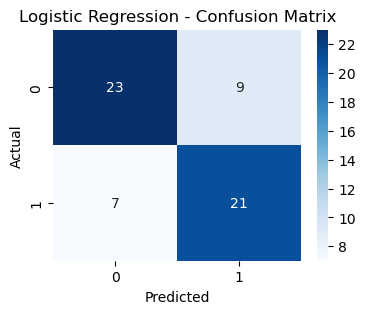

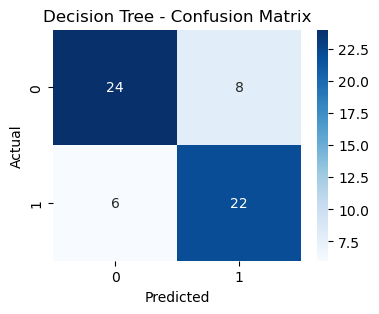

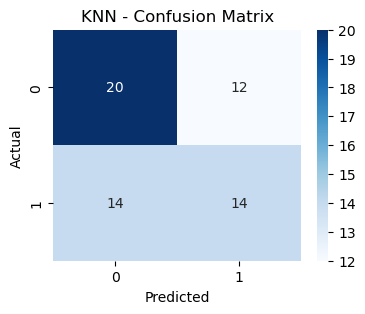

In [36]:
models = {
    "Logistic Regression": y_pred,
    "Decision Tree": y_dt_pred,
    "KNN": y_knn_pred
}

import matplotlib.pyplot as plt
import seaborn as sns

for name, preds in models.items():
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()